In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
columns = ["frame","frame_length","start","apdulen","type","rx","tx",
             "type_id","causeTx","ioa","numix","oa",
             "qds","qoi","value","label"]
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fixdataset.csv', header=None, names = columns)

In [ ]:
dataset.head(7)

,frame,frame_length,start,apdulen,type,rx,tx,type_id,causeTx,ioa,numix,oa,qds,qoi,value,label
0,1,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
1,2,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
2,3,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
3,4,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
4,5,82,68,14,0,0,0,100,6,0,1,0.0,NaN,20.0,NaN,0
5,6,84,68,16,0,1,0,11,20,1,1,0.0,241.0,NaN,12650.0,0
6,7,84,68,16,0,1,0,11,20,1,1,0.0,241.0,NaN,12644.0,0


In [ ]:
dataset.fillna(dataset.mean(), inplace = True)

In [ ]:
dataset.head(7)

,frame,frame_length,start,apdulen,type,rx,tx,type_id,causeTx,ioa,numix,oa,qds,qoi,value,label
0,1,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
1,2,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
2,3,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
3,4,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
4,5,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
5,6,84,68,16,0,1,0,11,20,1,1,0.0,241.0,20.0,12650.000000,0
6,7,84,68,16,0,1,0,11,20,1,1,0.0,241.0,20.0,12644.000000,0


In [ ]:
y = dataset['label']
X = dataset.drop(['label','apdulen','type','rx','tx','frame'], axis =1)

In [ ]:
X

,frame_length,start,type_id,causeTx,ioa,numix,oa,qds,qoi,value
0,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
1,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
2,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
3,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
4,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
...,...,...,...,...,...,...,...,...,...,...
44067,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
44068,100,68,11,20,1,1,0.0,241.0,20.0,14850.000000
44069,100,68,100,10,0,1,0.0,241.0,20.0,12644.381357
44070,100,68,11,20,1,1,0.0,241.0,20.0,14860.000000


0    42819
1     1253
Name: label, dtype: int64


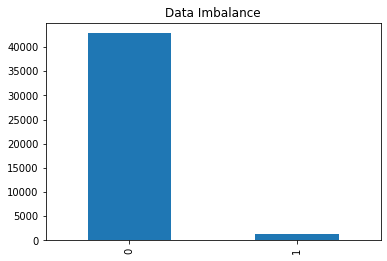

In [ ]:
target = 'label'
c = pd.DataFrame(data=y,columns=["label"])
c.label.value_counts().plot(kind='bar', title='Data Imbalance');
print(dataset[target].value_counts())

In [ ]:
X.head()

,frame_length,start,type_id,causeTx,ioa,numix,oa,qds,qoi,value
0,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
1,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
2,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
3,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357
4,82,68,100,6,0,1,0.0,241.0,20.0,12644.381357


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm =mm.fit_transform(X)

In [ ]:
OverSampler = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_resample, y_resample = OverSampler.fit_resample(X,y)


In [ ]:
X_mm

array([[0.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       [0.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       [0.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       ...,
       [1.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.98985327],
       [1.        , 0.        , 0.00802597, ..., 0.        , 0.        ,
        0.82811748]])

In [ ]:
conv = pd.DataFrame(X_mm,columns=  ['frame_length',	'start',	'type_id','causeTX','ioa'	,'numix',	'oa'	,'qds'	,'qoi',	'value'])
conv

,frame_length,start,type_id,causeTX,ioa,numix,oa,qds,qoi,value
0,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
1,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
2,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
3,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
4,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
...,...,...,...,...,...,...,...,...,...,...
44067,0.0,0.0,0.008026,0.000000,0.0,1.0,0.0,0.0,0.0,0.828117
44068,1.0,0.0,0.000000,0.388889,1.0,1.0,0.0,0.0,0.0,0.989123
44069,1.0,0.0,0.008026,0.111111,0.0,1.0,0.0,0.0,0.0,0.828117
44070,1.0,0.0,0.000000,0.388889,1.0,1.0,0.0,0.0,0.0,0.989853


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=21)
X_smote, y_smote = smote.fit_resample(X_mm, y)

label
1        42819
0        42819
dtype: int64


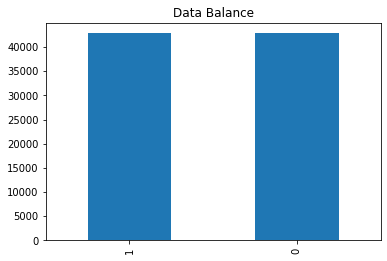

In [ ]:
c = pd.DataFrame(data=y_smote,columns=["label"])
c.label.value_counts().plot(kind='bar', title='Data Balance');
print (c.value_counts())

In [ ]:
target ='label'
tar = ['1','0']
feat = ['	frame_length',	'start',	'type_id',	'causeTX',	'ioa',	'numix','	oa'	,'qds',	'qoi','	value']
tar

['1', '0']

In [ ]:
feat

['\tframe_length',
 'start',
 'type_id',
 'causeTX',
 'ioa',
 'numix',
 '\toa',
 'qds',
 'qoi',
 '\tvalue']

**TRAIN 70% TRAIN 30%**



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=21)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [ ]:
prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction)

array([[29924,     2],
       [ 1397, 28623]])

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_train,prediction))

accuracy= 0.9766623294298201


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Train 70%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Train 70%


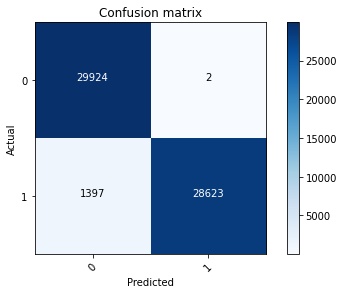

In [ ]:
cm = confusion_matrix(y_train, prediction)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
predictionTest = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_test,predictionTest))

accuracy= 0.9742332243499923


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionTest)

array([[12890,     3],
       [  659, 12140]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Test 30%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Test 30%


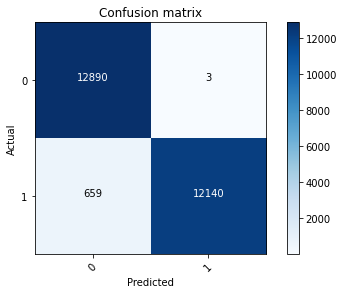

In [ ]:
cm = confusion_matrix(y_test, predictionTest)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
model.oob_score = model.score(X_test, y_test)
oob_error = 1 - model.oob_score
oob_error

0.025766775650007734

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report

In [ ]:
f1=f1_score(y_test, predictionTest)*100
f1

97.34584235426189

In [ ]:
TPR = 12890/(12890+659)*100
print(TPR)

95.13617241124807


In [ ]:
FPR = 3/(3+12140)*100
print (FPR)

0.024705591698921187


In [ ]:
TNR = 12140/(12140+3)*100
print (TNR)

99.97529440830107


In [ ]:
FNR = 659/(659+12890)*100
print (FNR)

4.8638275887519375


In [ ]:
prec = 12890/(12890+3)*100
print (prec)

99.9767315597611


In [ ]:
Undetection_Rate = 659/(659+12890)*100
print(Undetection_Rate)

4.8638275887519375


**TRAIN 60% TRAIN 40%**



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.4, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=21)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [ ]:
prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction)

array([[25616,     2],
       [ 1211, 24553]])

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_train,prediction))

accuracy= 0.9763925109960686


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Train 60%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Train 60%


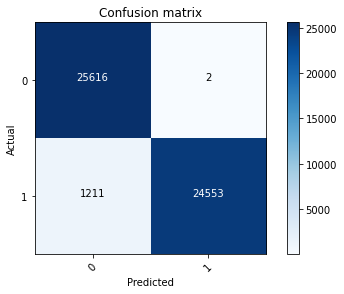

In [ ]:
cm = confusion_matrix(y_train, prediction)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
predictionTest = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_test,predictionTest))

accuracy= 0.9752160205511443


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionTest)

array([[17198,     3],
       [  846, 16209]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Test 40%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Test 40%


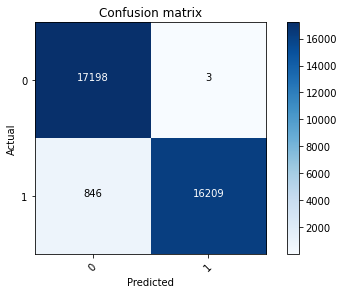

In [ ]:
cm = confusion_matrix(y_test, predictionTest)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
model.oob_score = model.score(X_test, y_test)
oob_error = 1 - model.oob_score
oob_error

0.024783979448855686

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report

In [ ]:
f1=f1_score(y_test, predictionTest)*100
f1

97.44792136351339

In [ ]:
TPR = 17198/(17198+846)*100
print(TPR)

95.31146087342053


In [ ]:
FPR = 3/(3+16209)*100
print (FPR)

0.01850481125092524


In [ ]:
TNR = 16209/(16209+3)*100
print (TNR)

99.98149518874907


In [ ]:
FNR = 846/(846+17198)*100
print (FNR)

4.688539126579473


In [ ]:
prec = 17198/(17198+3)*100
print (prec)

99.9825591535376


In [ ]:
Undetection_Rate = 846/(846+17198)*100
print(Undetection_Rate)

4.688539126579473


**TRAIN 80% TRAIN 20%**



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.2, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=21)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [ ]:
prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction)

array([[34250,     3],
       [ 1614, 32643]])

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_train,prediction))

accuracy= 0.9763976061888775


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Train 80%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Train 80%


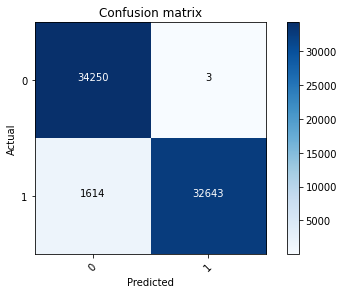

In [ ]:
cm = confusion_matrix(y_train, prediction)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
predictionTest = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_test,predictionTest))

accuracy= 0.9741943017281645


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionTest)

array([[8564,    2],
       [ 440, 8122]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix Test 20%')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix Test 20%


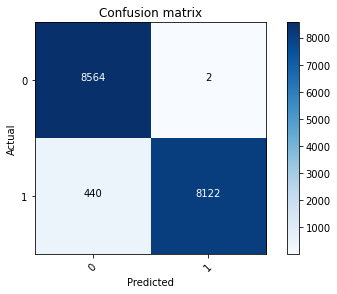

In [ ]:
cm = confusion_matrix(y_test, predictionTest)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
model.oob_score = model.score(X_test, y_test)
oob_error = 1 - model.oob_score
oob_error

0.025805698271835542

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report

In [ ]:
TPR = 8564/(8562+440)*100
print(TPR)

95.134414574539


In [ ]:
FPR = 2/(2+8122)*100
print (FPR)

0.02461841457410143


In [ ]:
TNR = 8122/(8122+2)*100
print (TNR)

99.9753815854259


In [ ]:
FNR = 440/(440+8564)*100
print (FNR)

4.886717014660151


In [ ]:
prec = 8564/(8564+2)*100
print (prec)

99.9766518795237


In [ ]:
Undetection_Rate = 440/(440+8564)*100
print(Undetection_Rate)

4.886717014660151
